In [2]:
import pandas as pd

In [3]:
iris = pd.read_csv('/Users/victoria/dataV2-labs/module-3/Data-Cleaning-Challenge/iris-data.csv')

In [4]:
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# 5 null values in petal_width_cm

In [15]:
iris[(iris['petal_width_cm'].isnull()==True)]
#we can change the value to average

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [31]:
iris.loc[(iris.petal_width_cm.isnull()==True), 'petal_width_cm'] = iris.petal_width_cm.mean()

In [32]:
iris[(iris['petal_width_cm'].isnull()==True)] #done

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [33]:
iris.info() #perfect

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<AxesSubplot:title={'center':'sepal_length_cm'}>,
        <AxesSubplot:title={'center':'sepal_width_cm'}>],
       [<AxesSubplot:title={'center':'petal_length_cm'}>,
        <AxesSubplot:title={'center':'petal_width_cm'}>]], dtype=object)

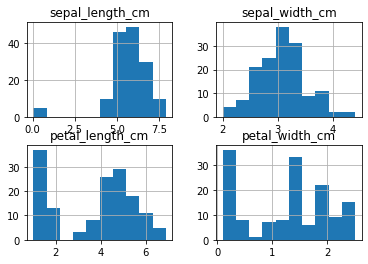

In [7]:
iris.hist()

In [8]:
iris['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [9]:
def unify(x):
    if x == 'versicolor':
        x = 'Iris-versicolor'
    elif x == 'Iris-setossa':
        x = 'Iris-setosa'
    else:
        x = x
    return x

iris['class'] = iris['class'].apply(lambda x: unify(x))

In [10]:
iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

<AxesSubplot:>

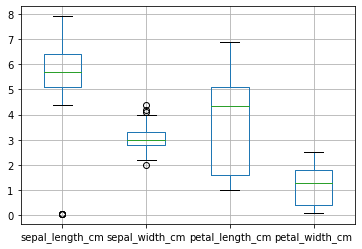

In [11]:
iris.boxplot()

In [22]:
iris[(iris['sepal_length_cm']<1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [ ]:
# they are clearly errors. what to do with them?
# maybe *100? with the mean 5.6 that may be logical

In [24]:
iris.loc[(iris.sepal_length_cm<1), 'sepal_length_cm'] = iris.sepal_length_cm*100

In [26]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.838667,3.054667,3.758667,1.236552
std,0.804416,0.433123,1.764420,0.755058
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

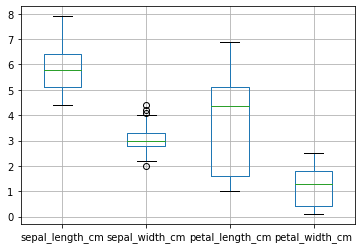

In [27]:
iris.boxplot()

In [ ]:
# much better now. I think sepal_width_cm is alright, they are not serious outliers

In [35]:
iris.to_csv('/Users/victoria/dataV2-labs/module-3/Data-Cleaning-Challenge/iris-clean.csv')

In [36]:
clean = pd.read_csv('/Users/victoria/dataV2-labs/module-3/Data-Cleaning-Challenge/iris-clean.csv')

In [37]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       150 non-null    int64  
 1   sepal_length_cm  150 non-null    float64
 2   sepal_width_cm   150 non-null    float64
 3   petal_length_cm  150 non-null    float64
 4   petal_width_cm   150 non-null    float64
 5   class            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<AxesSubplot:>

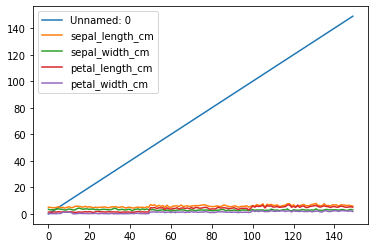

In [39]:
clean.plot()